# Analysis of trajectories


Here we analyse random trajectory. As an input we take the data in dataframe format:
dataframe(x(t), y(t)). Here we focus on two-dimensional trajectory, although analysis can be done for N-dimensional space.


### Main questions about trajectories
Each trajectory seems random and it is hard to compare one X_1(t) to another X_2(t). 
Primarily we are interested in properties of spatial and temporal properties of X_i(t): 
1. distribution of duration of stops of human trajectories p(t)
2. distribution of length of jumps between two stops q(r)

These properties (distributions p(t) and q(r)) can help us to see if different people have different patterns in their trajectories X_i(t) of distributions of duration of stops and lengths of stops.

Text(0.5, 0.98, 'Distribution of steps for RW mu=0.5 sigma= 20')

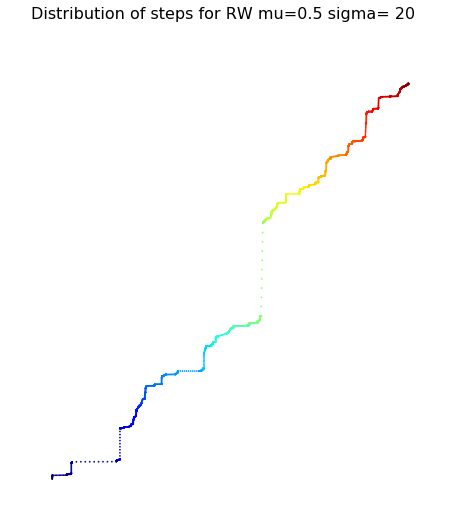

In [4]:
'''
We generate random trajectory of continuous time random walk (CTRW) in N-dimensional space. We take N=2, easier to visualize.
Alternatively we can also create or load dataframe with trajectories.

moves_dataframe = pd.DataFrame(data={
        'date': moves_processed_data['date'],
        'steps': moves_processed_data['steps'],
        'distance': moves_processed_data['distance'],
        'latitude': moves_processed_data['lat'],
        'longitude': moves_processed_data['lon']
})
#Plot distribution of moves from new dataframe.
#Compare moves from 1st trajectory and 2nd trajectory
sns.distplot(df1['distance'])
'''


import matplotlib.image as mpimg
import numpy as np
from itertools import cycle
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import pyplot as plt


'''
Parameters of RW setting

'''
n= 500 #length of random walk
mu = 0.5 #normal distribution
sigma =20
beta = 5 #exponential parameters
a = 1 # pareto distribution
weib = 1 #weibul parameter

'''
Simple RW motion with random steps
'''

x = np.cumsum(np.random.randn(n))
y = np.cumsum(np.random.randn(n)) 

'''
Now we introduce some CTRW motion in between the steps driven from 
 Weibul distribution 
 Pareto distribution 
 Random normal distribution
'''

x =  np.cumsum(np.random.exponential(1./beta, n))
y =  np.cumsum(np.random.exponential(1./beta, n))

x_w = np.cumsum(np.random.weibull(weib, n))
y_w = np.cumsum(np.random.weibull(weib, n))

x =  np.cumsum(np.random.pareto(a, n))
y =  np.cumsum(np.random.pareto(a, n))

x_n =  np.cumsum(np.random.normal(mu, sigma, n))
y_n =  np.cumsum(np.random.normal(mu, sigma, n))


# We add 10 intermediary points between two
# successive points. We interpolate x and y.


'''
Now the trajectory is recorded in two arrays x2, y2
'''
k = 10
X_tr = np.interp(np.arange(n * k), np.arange(n) * k, x)
Y_tr = np.interp(np.arange(n * k), np.arange(n) * k, y)
#print('x2 rw', x2)

'''
plotting one RW
'''

fig, ax = plt.subplots(1, 1, figsize=(8, 8))
ax.scatter(X_tr, Y_tr, c=range(n * k), linewidths=0,
           marker='o', s=3, cmap=plt.cm.jet,) # We draw our points with a gradient of colors.
ax.axis('equal')
ax.set_axis_off()

#fig.suptitle('Distribution of steps for RW a='+str(a), fontsize=16)
fig.suptitle('Distribution of steps for RW mu='+str(mu)+' sigma= '+str(sigma), fontsize=16)
#plt.savefig('RW_motion_steps_normal_mu'+str(mu)+'sigma'+str(mu)+'.png')


#  Analysis of trajectories
Now we are ready to analyze our trajectory, encoded in two arrays (X_tr(t),Y_tr(t)). 
You can load your data in these files X_tr(t), Y_tr(t). 
We first do standard Continuous time rando walk analysis, then we come to more advanced analysis.


### Continuous time random walk. Definition and ideas.

*Continuous time random walk* (CTRW) is a generalization of a random walk where the wandering particle waits for a random time between jumps. 
It is a stochastic jump process with arbitrary distributions of jump lengths and waiting times.
More generally it can be seen to be a special case of a Markov renewal process. 

Important properties of CTRW are r(t) and d(t) distributions of lengths of jumps and durations correspondingly. 

For more details look at code and papers here 
https://github.com/Liyubov/networks_random_walking

### Analysis 

We use here several methods of analysis of trajectories using CTRW framework. 

1. Standard deviation. 
Given the input trajectory r(t) =(x(t),y(t)), we first estimate standard deviation for trajectory (STD), which is just the root of variance so var(τ)=(Var(r(t)-r(t-τ))), calculating it in Euclidean space.


2. 
One can also estimate Hurst exponent, which is used as a measure of long-term memory of time series
https://en.wikipedia.org/wiki/Hurst_exponent#Estimating_the_exponent.
Hurst exponent relates to the autocorrelations of the time series, and the rate at which these decrease as the lag between pairs of values increases. 
For any trajectory we can write Var(τ) ∝ τ^(2H), where H is the Hurst exponent.
Hence (Var(z(t)-z(t-τ))) ∝ τ^(2H). 
Then 
[log (Var(z(t)-z(t-τ))) / log τ ] / 2 ∝ H (gives the Hurst exponent) where we know the term in square brackets on far left is the slope of a log-log plot of tau and a corresponding set of variances.
*Range of Hurst exponent.*
A value H in the range 0.5–1 indicates a time series with long-term positive autocorrelation, meaning both that a high value in the series will probably be followed by another high value and that the values a long time into the future will also tend to be high. A value in the range 0 – 0.5 indicates a time series with long-term switching between high and low values in adjacent pairs, meaning that a single high value will probably be followed by a low value and that the value after that will tend to be high, with this tendency to switch between high and low values lasting a long time into the future. A value of H=0.5 can indicate a completely uncorrelated series.

Basically, the idea of Hurst exponent is to characterize trajectory in terms of self-repetition. If Hurst exponent is between [0,0.5], then it indicates that trajectory has switches between different regimes. 
While if Hurst exponent  [0.5, 1], then it means that there are less switches between long and short jumps and trajectory has long-term positive autocorrelation. If Hurst exponent is 0.5, then it indicates completely uncorrelated series (although it depends on scales). 




In [5]:

'''
We adapt the function to estimate:
1.  STD of trajectories;
2.  Hurst exponent for trajectories.

First we estimate STD 
Then we estimate Hurst exponent. 
'''


print("Calculating STD of trajectory ")  
data1 = list(zip(X_tr, Y_tr))#zip together x and y coordinates
#data1 = np.asarray(latlon1) # if imported from dataframe
print("std of trajectory : ", np.std(data1)) 


lags = range(2,100)
def hurst_exponen_chan(p):
    '''
    given series p(t), where t is time 
    '''    
    variancetau = []; tau = []

    for lag in lags: 

        #  Write the different lags into a vector to compute a set of tau or lags
        tau.append(lag)

        # Compute the log returns on all days, then compute the variance on the difference in log returns
        # call this pp or the price difference
        pp = np.subtract(p[lag:], p[:-lag])
        variancetau.append(np.var(pp))

    # we now have a set of tau or lags and a corresponding set of variances.
    #print tau
    #print variancetau

    # plot the log of those variance against the log of tau and get the slope
    m = np.polyfit(np.log10(tau),np.log10(variancetau),1)

    hurst = m[0] / 2

    return hurst

print('hurtst exponent')
print(hurst_exponen_chan(data1))


Calculating STD of trajectory 
std of trajectory :  734.079518065
hurtst exponent
0.616395387189


### Estimation of scaling exponent of trajectory 

Given trajectory displacements r(t) = t^(-b-1),  we estimate b constant from the trajectory. 
Then  we fit this distribution of travelling distances to a power law. 

If parameter b<2, then this indicates that trajectories are reminiscent of scale-free random walks known as Le´vy flights. If parameter b>2, this indicates that trajectory generating process is related to normal spreading.

For this we are using Python package for  analysis of diffusion data
https://diffusion-analysis-md-simulations.readthedocs.io/en/latest/diffusion_analysis.html

    *diffusion_analysis.fit_anomalous_diffusion_data(time_data_array, MSD_data_array, degrees_of_freedom=2)*
    
function should fit anomalous diffusion data to Equation 1 in [Kneller2011], and return appropriate diffusion parameters:    MSD=ND_αt^α.


In [6]:
'''
We adapt the function to estimate:
1.  STD of trajectories;
2.  beta exponent 
'''

import numpy as np 
#to prepare for diffusion analysis, load my github-hosted diffusion module:
import sys; sys.path.append('/sansom/sc2/bioc1009/github_projects/diffusion_utility/diffusion_analysis_MD_simulations')
#import diffusion_analysis


print("Calculating beta constant of first trajectory ")  

#load trajectory in 2D 
#data1 = np.asarray(latlon1)
print("std of trajectory : ", np.std(data1)) 

#diffusion_analysis.fit_anomalous_diffusion_data(time_data_array, MSD_data_array)


Calculating beta constant of first trajectory 
std of trajectory :  734.079518065


## Convex hull analysis of trajectories 

Given trajectory in 2D (in general in N dimensions) we can characterize some of its properties by the applying convex hull algorithms. 

### Example

Given random trajectory in N-dimensions 
<img src="convex.png" alt="Drawing" style="width: 200px;"/>
we draw the polygon around it, and estimate its volume, which allows us to characterize the trajectory qualitatively .


General information about convex hull
https://en.wikipedia.org/wiki/Convex_hull

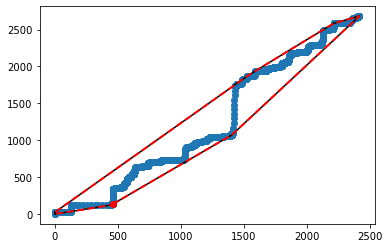

calculating area
Volume is 1012303.56
Area is 7345.13


In [11]:
import matplotlib.pyplot as plt
import numpy as np
import os
#from RDP import rdp #import rdp
import networkx as nx
from scipy.spatial import ConvexHull


N = 10 # number of points  
M = 5 # dimensions

"""
LOADING input data:
# entries:  public_i pub_tag_i pub_time_i  
# public#i (Name and title encoded into number -> separate table) 
# tag of publication: there are finite number of tags (some of them are not corresponding to one field)
# time index is better to make in linear scale -> 1:365*y, where y is number of years)
"""

#data points should be data from trajectories of researchers
datarandom = np.random.rand(N,M) #generate N datapoints in M dimensions
#data = np.random.rand(30, 2)   # 30 random points in 2-D

#load trajectory from the file or from above
#data1 = np.asarray(latlon1) #give array, not the list
#data2 = np.asarray(latlon2) #get data from the second participant

                       
"""
function ALGORITHM convext hull
"""
         

def convex_hull(data):
              
    hull = ConvexHull(data)
    #print('data', data)

    plt.plot(data[:,0], data[:,1], 'o')
    for simplex in hull.simplices:
        plt.plot(data[simplex, 0], data[simplex, 1], 'k-')
    
    plt.plot(data[hull.vertices,0], data[hull.vertices,1], 'r--', lw=2)
    plt.plot(data[hull.vertices[0],0], data[hull.vertices[0],1], 'ro')
    plt.show()   
    """
    estimate the volume of the convex hull for trajectory in time frame
    """ 
    print('calculating area')
    points = np.array([[-1,-1, 1], [1, 1, 0], [-1, 1, 0], [1,-1, -1]])
    hull = ConvexHull(data)
    print("Volume is %2.2f" % hull.volume) # N-d object
    print("Area is %2.2f" % hull.area) # (N-1)-d object

    
'''
Now we apply convex hull to data to show how it works
We draw convex hull around trajectory
'''
convex_hull(np.asarray(data1))
#convex_hull(data2)
    

### Convex hull sliding window analysis of trajectories
We also analyze trajectory using sliding window analysis, where we measure the volume of convex hull $V(t,t+ \Delta t)$ for trajectory $Tr(t)=(X(t),Y(t))$ during the period of ($\Delta t$). 
To read more about convex hull algorithm applied to particle trajectories 
https://arxiv.org/pdf/1708.06517.pdf

making sliding window analysis...
steps  10000
0
102400.69342234747
1
103071.554985079
2
102936.89266213345
3
102802.23033918787
4
102667.56801624235
5
102561.67814398788
6
102461.38133839332
7
102361.08453279863
8
102260.78772720405
9
102160.49092160945
10
102060.19411601486
11
102054.8188413218
12
102049.29258686249
13
102043.76633240312
14
102038.26603567373
15
102033.07775632791
16
102027.8894769821
17
102022.7011976363
18
102017.51291829048
19
102012.32463894467
20
102007.13635959885
21
102007.8720867418
22
102009.25377338947
23
102046.5635484336
24
102212.74181813789
25
102378.92008784215
26
102545.09835754643
27
102711.27662725082
28
102877.4548969551
29
103043.63316665933
30
103209.81143636371
31
103369.28275720264
32
103367.79371882866
33
103366.30468045469
34
103364.81564208066
35
103363.32660370671
36
103361.83756533274
37
103360.3485269588
38
103358.85948858483
39
103357.37045021084
40
103355.88141183683
41
100773.511724203
42
98185.74222682821
43
95597.66795349335
44
93369

53244.42781763208
414
53159.05436199833
415
53073.68090636456
416
52988.3074507308
417
52902.93399509703
418
52817.56053946326
419
52751.24052601891
420
52717.37160846797
421
52719.088190311326
422
52816.118727151494
423
52979.1925921578
424
53142.26645716414
425
53305.34032217046
426
53468.41418717682
427
53631.48805218315
428
53794.56191718947
429
53957.63578219583
430
54120.709647202115
431
54281.114490447595
432
54326.37125902201
433
54372.63493299072
434
54418.89860695942
435
54465.16228092813
436
54511.42595489681
437
54557.68962886553
438
54603.97453663089
439
54650.65845530178
440
54697.34237397264
441
54745.705358041414
442
54847.75191655407
443
54949.79847506675
444
55051.84503357941
445
55153.89159209207
446
55255.93815060478
447
55357.98470911741
448
55460.03126763009
449
55562.07782614274
450
55664.12438465538
451
55736.68516567147
452
55730.79863164213
453
55724.91209761276
454
55719.0255635834
455
55713.13902955404
456
55707.252495524655
457
55727.34331358496
458
55751.0

801
56391.62465923418
802
56442.15086226684
803
56492.67706529948
804
56543.20326833211
805
56593.72947136476
806
56644.25567439738
807
56694.78187743002
808
56745.30808046264
809
56795.83428349524
810
56846.360486527985
811
56889.354173224034
812
56891.315767946
813
56905.608467955535
814
56919.90116796518
815
56934.193867974696
816
56948.48656798428
817
56962.77926799382
818
56977.07196800339
819
56991.36466801296
820
57005.65736802255
821
56855.7113282956
822
56688.09481063269
823
56520.478292969754
824
56352.86177530679
825
56185.24525764383
826
56075.426929002475
827
55965.849208354164
828
55856.27148770575
829
55746.69376705745
830
55751.73967000012
831
55774.69069223691
832
55739.307739695076
833
55706.11456474848
834
55672.921389801944
835
55639.72821485533
836
55606.53503990882
837
55584.46986104154
838
55563.427920355156
839
55542.385979668885
840
55521.34403898256
841
55528.770116048014
842
55527.45262732942
843
55526.13513861084
844
55524.81764989224
845
55529.36099887905
8

50545.99523816545
1243
50893.75360019116
1244
51241.5119622169
1245
51589.27032424258
1246
51937.02868626833
1247
52284.78704829396
1248
52632.54541031967
1249
52980.303772345374
1250
53328.06213437117
1251
53734.16288774324
1252
53737.35111382591
1253
53740.53933990861
1254
53743.7275659913
1255
53746.91579207395
1256
53750.10401815658
1257
53753.29224423924
1258
53756.48047032192
1259
53759.6686964046
1260
53762.85692248727
1261
53755.08177284975
1262
53763.22019696674
1263
53774.14965082865
1264
53785.07910469055
1265
53796.00855855247
1266
53806.938012414364
1267
53817.867466276286
1268
53828.79692013815
1269
53839.72637400002
1270
53850.65582786194
1271
53767.22508681856
1272
53698.51375929872
1273
53690.598734237064
1274
53714.42364728584
1275
53738.24856033466
1276
53762.07347338345
1277
53785.89838643226
1278
53809.72329948108
1279
53833.67191546379
1280
53858.7708227846
1281
53852.82359100763
1282
53837.44456061665
1283
53822.06553022562
1284
53806.68649983457
1285
53791.32218

129467.34882470025
1641
129085.68153892492
1642
128611.5820102561
1643
128137.482481587
1644
127663.38295291779
1645
127189.28342424882
1646
126715.18389557974
1647
126241.08436691054
1648
125766.98483824151
1649
125292.88530957249
1650
125076.8378874531
1651
125085.96767427881
1652
125097.18995979728
1653
125108.4122453158
1654
125119.6345308342
1655
125130.85681635277
1656
125142.07910187128
1657
125153.30138738967
1658
125164.53480267644
1659
125175.81752320378
1660
125187.10024373105
1661
125198.17184424297
1662
125233.26672986605
1663
125268.361615489
1664
125303.45650111187
1665
125338.55138673486
1666
125373.64627235776
1667
125408.74115798084
1668
125443.83604360372
1669
125478.93092922683
1670
125514.02581484968
1671
125548.82340367336
1672
125621.47751437785
1673
125694.13162508221
1674
125766.78573578665
1675
125839.45063651662
1676
125912.16360718544
1677
125984.87657785407
1678
126057.58954852291
1679
126130.3025191917
1680
126203.01548986026
1681
126275.21952881808
1682
1

2031
103318.08602411719
2032
103309.31651947026
2033
103300.5470148231
2034
103293.44523631372
2035
103286.65983474223
2036
103279.87443317077
2037
103273.08903159929
2038
103266.30363002793
2039
103259.51822845639
2040
103252.73282688491
2041
102960.82523816831
2042
102734.7683838418
2043
102508.71152951533
2044
102282.65467518887
2045
102056.59782086253
2046
101830.54096653595
2047
101604.48411220947
2048
101378.42725788301
2049
101152.37040355653
2050
100926.31354923004
2051
100988.97060333169
2052
101002.49968809768
2053
101016.02877286376
2054
101029.5578576299
2055
101043.08694239613
2056
101056.61602716218
2057
101070.14511192833
2058
101083.6741966945
2059
101097.20328146066
2060
101110.73236622673
2061
101112.79638367436
2062
101219.30204995333
2063
101332.83966561382
2064
101451.67559885926
2065
101570.51153210485
2066
101689.34746535035
2067
101808.1833985958
2068
101927.01933184132
2069
102045.85526508684
2070
102164.69119833237
2071
102243.5172870974
2072
102205.5690905114

2454
145494.4698492145
2455
145477.32951968888
2456
145460.18919016316
2457
145443.0488606376
2458
145427.1775163613
2459
145413.02512327844
2460
145400.3429885514
2461
145382.1438848329
2462
145362.7189517981
2463
145343.29401876306
2464
145323.86908572813
2465
145304.44415269318
2466
145285.01921965822
2467
145271.32486249285
2468
145258.8482985769
2469
145246.40758149629
2470
145233.9668644156
2471
145225.60583406367
2472
145214.67046970487
2473
145203.73510534613
2474
145192.79974098716
2475
145181.86437662857
2476
145170.93340857097
2477
145160.00556545597
2478
145149.0777223411
2479
145138.1498792261
2480
145127.22203611105
2481
145092.77913662716
2482
145054.46070978258
2483
145016.14228293786
2484
144977.82385609334
2485
144939.5054292486
2486
144901.18700240398
2487
144862.86857555946
2488
144824.55014871474
2489
144786.23172186996
2490
144747.91329502553
2491
144674.293443091
2492
144604.45456919592
2493
144534.61569530074
2494
144464.77682140557
2495
144394.93794751045
2496


40000.60526419205
2868
40026.13094645703
2869
40051.65662872213
2870
40077.182310987344
2871
40061.13866241749
2872
40019.9770071484
2873
39978.8153518794
2874
39937.65369661023
2875
39896.49204134113
2876
39855.33038607206
2877
39814.16873080301
2878
39773.007075533904
2879
39731.84542026479
2880
39690.68376499572
2881
39332.92531458456
2882
38995.01274745067
2883
38657.10018031676
2884
38319.187613182745
2885
37981.27504604888
2886
37643.362478915
2887
37305.449911781034
2888
36967.53734464708
2889
36629.62477751315
2890
36300.85943567884
2891
36324.65458077679
2892
36325.681977101965
2893
36326.70937342706
2894
36327.736769752286
2895
36328.76416607743
2896
36329.79156240261
2897
36330.81895872776
2898
36331.84635505289
2899
36332.87375137795
2900
36333.90114770323
2901
36290.313000272276
2902
36251.726416344296
2903
36213.139832416426
2904
36174.55324848843
2905
36135.96666456041
2906
36097.380080632414
2907
36058.79349670445
2908
36020.206912776404
2909
35981.62032884845
2910
3594

27025.815845970472
3231
26993.770218098547
3232
26944.93530438653
3233
26896.100390674466
3234
26847.265476962457
3235
26798.43056325037
3236
26749.595649538354
3237
26700.760735826298
3238
26659.075620028696
3239
26649.029731675662
3240
26639.285485100834
3241
26637.131475467108
3242
26646.899438505963
3243
26656.66740154482
3244
26666.43536458363
3245
26676.203327622436
3246
26685.971290661273
3247
26695.739253700147
3248
26705.507216738948
3249
26715.27517977779
3250
26725.0431428166
3251
26554.308049198076
3252
26372.002927130965
3253
26189.69780506385
3254
26007.392682996604
3255
25825.087560929504
3256
25642.782438862312
3257
25460.47731679514
3258
25278.17219472799
3259
25216.816124521018
3260
25205.28868266035
3261
25204.350428378235
3262
25210.79092810865
3263
25217.231427839117
3264
25223.671927569554
3265
25230.112427300002
3266
25236.55292703042
3267
25242.993426760906
3268
25249.433926491336
3269
25255.87442622174
3270
25262.31492595216
3271
25225.306544341962
3272
25196.6

40323.63312662675
3614
40343.46418541536
3615
40363.295244203946
3616
40383.12630299249
3617
40402.95736178103
3618
40422.78842056963
3619
40442.619479358225
3620
40462.45053814675
3621
40118.69878251747
3622
39933.31442181798
3623
40019.48566909967
3624
40277.07049011649
3625
40534.65531113349
3626
40792.24013215043
3627
41049.824953167285
3628
41313.83528727593
3629
41579.220403088046
3630
41880.9969876537
3631
42506.738802835156
3632
42522.26304324333
3633
42537.78728365146
3634
42553.311524059696
3635
42568.83576446798
3636
42584.36000487617
3637
42599.88424528434
3638
42615.40848569253
3639
42630.93272610083
3640
42646.456966509
3641
42660.2804924203
3642
42714.99384742995
3643
42769.707202439495
3644
42825.79462532865
3645
42882.09897590021
3646
42938.403326471875
3647
42994.707677043494
3648
43051.012027615194
3649
43107.31637818685
3650
43163.62072875843
3651
43179.049815546285
3652
43138.34050349136
3653
43097.63119143635
3654
43056.92187938149
3655
43016.21256732639
3656
4297

41573.10641681368
3984
41563.58881687052
3985
41554.07121692756
3986
41544.5536169845
3987
41535.03601704139
3988
41525.51841709838
3989
41522.26848793356
3990
41548.84170862648
3991
41577.805506722165
3992
41569.73786751128
3993
41561.670228300485
3994
41553.60258908979
3995
41545.53494987896
3996
41537.467310668144
3997
41529.399671457366
3998
41521.33203224651
3999
41513.26439303563
4000
41505.19675382496
4001
41315.20655821218
4002
41125.216362599356
4003
40935.22616698649
4004
40745.23597137381
4005
40555.24577576101
4006
40365.25558014827
4007
40175.26538453541
4008
39985.27518892262
4009
39800.02467346897
4010
39623.352354902345
4011
39622.87814952645
4012
39622.40394415045
4013
39621.929738774554
4014
39621.45553339866
4015
39620.9813280227
4016
39620.507122646784
4017
39620.03291727089
4018
39619.55871189492
4019
39619.084506519044
4020
39618.610301143104
4021
39614.509436634144
4022
39610.40857212526
4023
39606.30770761635
4024
39602.20684310742
4025
39598.10597859852
4026
39

4344
18977.957142419782
4345
18950.427427049242
4346
18936.8579643138
4347
18936.25405266711
4348
18935.650141020553
4349
18935.04622937383
4350
18934.442317727215
4351
18928.62051437701
4352
18922.79871102683
4353
18916.976907676686
4354
18911.155104326455
4355
18905.333300976305
4356
18899.511497626023
4357
18893.68969427582
4358
18887.86789092569
4359
18882.046087575498
4360
18876.22428422531
4361
18214.09335905832
4362
17551.962433891436
4363
16889.831508724485
4364
16227.700583557475
4365
15565.569658390696
4366
14903.438733223747
4367
14241.307808056763
4368
13650.233238940837
4369
13397.192908041892
4370
13217.791048863673
4371
13217.71907814871
4372
13217.647107433833
4373
13217.575136718815
4374
13217.503166003933
4375
13217.431195288982
4376
13217.359224574035
4377
13217.287253859087
4378
13217.215283144098
4379
13217.143312429105
4380
13217.071341714169
4381
13210.423840385174
4382
13203.776339056072
4383
13197.128837727038
4384
13190.48133639799
4385
13183.833835068941
4386

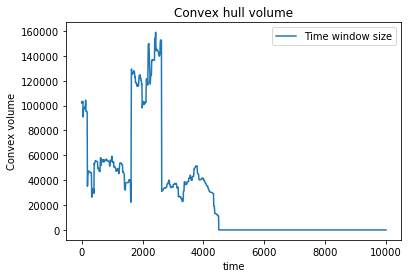

In [16]:


import matplotlib.pyplot as plt
import numpy as np
import os
#from RDP import rdp #import rdp
import networkx as nx
from scipy.spatial import ConvexHull


"""
we use the same data1 file as in cells above 
we specify parameters of convex hull analysis below
"""

#N = 10 # number of points for random trajectory, if it is used 
#M = 5 # dimensions of random trajectory
size_window = 1000 #sliding window should not be too small, otherwise it is not convex

                       
def convex_hull_window(data):
              
    hull = ConvexHull(data)

#    plt.plot(data[:,0], data[:,1], 'o')
#    for simplex in hull.simplices:
#        plt.plot(data[simplex, 0], data[simplex, 1], 'k-')   
#    plt.plot(data[hull.vertices,0], data[hull.vertices,1], 'r--', lw=2)
#    plt.plot(data[hull.vertices[0],0], data[hull.vertices[0],1], 'ro')
#    plt.show()   


    #points = np.array([[-1,-1, 1], [1, 1, 0], [-1, 1, 0], [1,-1, -1]])
    #hull = ConvexHull(data)
    print(hull.volume) # Volume of N-d object "Volume is %2.2f" % 
    #print("Area is %2.2f" % hull.area) # (N-1)-d object
    return hull.volume


def convex_hull_sliding_window(data, steps, size_window):
    '''
    data - trajectory
    steps - number of time steps in trajectory 
    size_window - time size of the sliding window
    '''

    volume_array = np.zeros(steps)
    
    for itime in range(0, int((steps-size_window)/2)): #steps-1):
        print(itime)
        time_max = (itime +size_window)%(steps+1) #calculate maximum time for sliding window
        data_i = data[itime: time_max] #cut data_i  from origianal data by cutting trajectory 
        volume_array[itime] = convex_hull_window(data_i)#apply convex_hull function
        #make exception for non-convex areas
    return volume_array

'''
Apply sliding window analysis to example trajectory
'''


print('making sliding window analysis...')
steps = np.size(data1) 
print('steps ', steps)

conv_array = convex_hull_sliding_window(np.asarray(data1), steps, size_window)

np.savetxt('convex_array.out', conv_array)#, delimiter=',') 
plt.plot(conv_array)
plt.title("Convex hull volume")
plt.xlabel("time")
plt.ylabel("Convex volume")
plt.legend(["Time window size"])
plt.show()